In [1]:
%cd ..


/Users/kubak/Desktop/mini/sem1/EvolutionaryGradient


In [2]:
from models.neural_network import SimpleNN
from models.de import DifferentialEvolution
from models.es import EvolutionStrategy
from models.adam import train_with_adam
from utils.data_loader import load_mnist
from utils.metrics import evaluate_model


### Load Datasets

In [8]:
import matplotlib.pyplot as plt

In [3]:
# Załaduj dane
train_loader, test_loader, input_size, output_size = load_mnist()



In [6]:
# Pobierz jedną paczkę danych
images, labels = next(iter(train_loader))

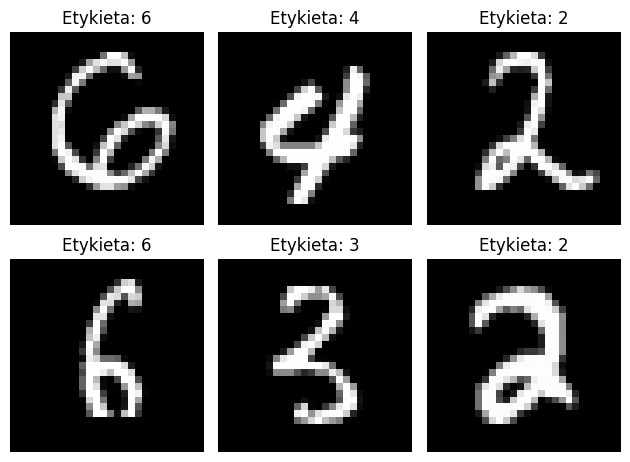

In [ ]:
# Wyświetl pierwsze 6 obrazów z etykietami
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i][0], cmap='gray')
    print(images[i].shape)
    plt.title(f'Etykieta: {labels[i].item()}')
    plt.axis('off')
    
plt.tight_layout()
plt.show()


# Create Neural Network

In [4]:
# Zainicjalizuj model
model = SimpleNN(input_size, hidden_size=10, output_size=output_size)


# Train

In [5]:
# Wybierz i uruchom metodę treningu
train_with_adam(model, train_loader, epochs=50, learning_rate=0.001)



RuntimeError: mat1 and mat2 shapes cannot be multiplied (1792x28 and 784x10)

# Evaluation

# Ewaluacja
accuracy = evaluate_model(model, test_loader)
print(f"Dokładność: {accuracy}%")